<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.2: Boosting

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9429
    - **ROC AUC**  = 0.9333
- Try to achieve better results!

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
## Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. WIlliam H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier



In [72]:
!pip install xgboost

In [2]:
from xgboost import XGBClassifier

In [13]:
# breast-cancer-wisconsin-data-old.csv
columns=['Sample_number',
        'Clump_Thickness',
        'Uniformity_of_Cell_Size',
        'Uniformity_of_Cell_Shape',
        'Marginal_Adhesion',
        'Single_Eplitelial_Cell_Size',
        'Bare_Nuclei',
        'Bland_Chromatin',
        'Normal_Nucleoli',
        'Mitoses',
        'Class'
]
df=pd.read_csv("..\\DATA\\breast-cancer-wisconsin-data-old.csv"
              ,header=None,names=columns,na_values='?')
df.head()


,Sample_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Eplitelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [14]:
df.Bare_Nuclei.unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [15]:
df.isnull().sum()

Sample_number                   0
Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Eplitelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [16]:
df.shape

(699, 11)

In [17]:
df_test = df[df['Bare_Nuclei'].notna()]

In [18]:
df_test.isnull().sum()

Sample_number                  0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Eplitelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [19]:
df_test.shape

(683, 11)

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [41]:
df["Class"].value_counts()

0    458
1    241
Name: Class, dtype: int64

In [21]:
df["Class"]=df["Class"].apply(lambda x:1 if x==4 else 0)
df.Class.value_counts()

0    458
1    241
Name: Class, dtype: int64

In [42]:
df_test.isnull().sum()

Sample_number                  0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Eplitelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [44]:
df.Class

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 699, dtype: int64

In [45]:
target="Class"
unwanted_columns=["Sample_number",target]
X=df_test[[col for col in df_test.columns if col not in unwanted_columns]]
y= df_test[target]
X.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Eplitelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [48]:
y.isnull().sum()

0

In [49]:
X.isnull().sum()

Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Eplitelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [50]:
boost= AdaBoostClassifier()
#if no estimator, it will use decisiontree with max_depth=1

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [33]:
#https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn


In [51]:
xgb=XGBClassifier()


In [52]:
xgb.fit(X_train,y_train)

[00:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\YC\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
xgb.score(X_test,y_test)

0.9562043795620438

In [54]:
boost.fit(X_train,y_train)

AdaBoostClassifier()

In [55]:
boost.score(X_test,y_test)

0.9197080291970803

In [56]:
tree.fit(X_train,y_train).score(X_test,y_test)

NameError: name 'tree' is not defined

In [57]:
boost.fit(X_train,y_train).score(X_test,y_test)

0.9197080291970803

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [50]:
y_pred = tree.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)

confusion #tn, fp, fn, tp

array([[77,  2],
       [ 7, 51]], dtype=int64)

training for model: AdaBoostClassifier


Score for AdaBoostClassifier:
91.97080291970804


Text(0.5, 1.0, 'Confusion Matrix for AdaBoostClassifier\n Accuracy : 91.97%')

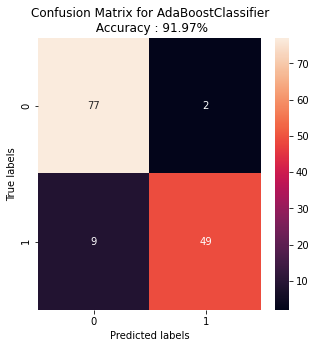

In [87]:
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
    model=boost
    model_name=model.__class__.__name__
    
    print(f"training for model: {model_name}\n\n")
    
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)*100
    
    print(f"Score for {model_name}:\n{score}")
    
    y_pred=model.predict(X_test)
    cm= confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(5,5))
    ax=plt.subplot()
    sns.heatmap(cm,annot=True,fmt='g',ax=ax)
    
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {score:.2f}%')

training for model: XGBClassifier


[20:16:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score for XGBClassifier:
95.62043795620438


C:\Users\YC\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Text(0.5, 1.0, 'Confusion Matrix for XGBClassifier\n Accuracy : 95.62%')

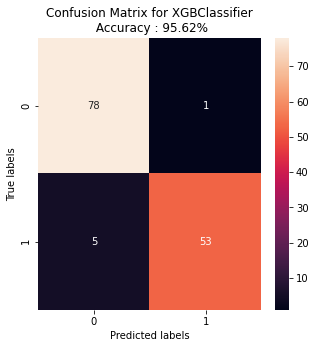

In [88]:
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
    model=xgb
    model_name=model.__class__.__name__
    
    print(f"training for model: {model_name}\n\n")
    
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)*100
    
    print(f"Score for {model_name}:\n{score}")
    
    y_pred=model.predict(X_test)
    cm= confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(5,5))
    ax=plt.subplot()
    sns.heatmap(cm,annot=True,fmt='g',ax=ax)
    
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');
    ax.set_title(f'Confusion Matrix for {model_name}\n Accuracy : {score:.2f}%')

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

© 2020 Institute of Data